Pedestrian detection by HOG + Linear SVM

[INFO] 1.jpg: 3 original boxes, 3 after suppression


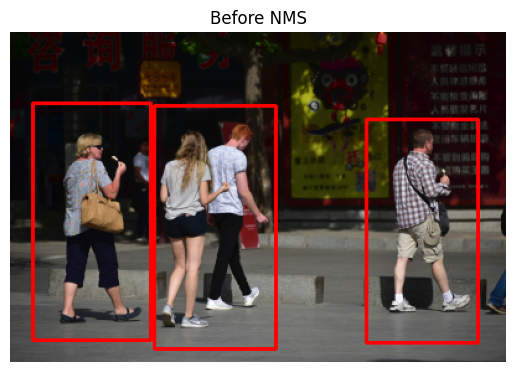

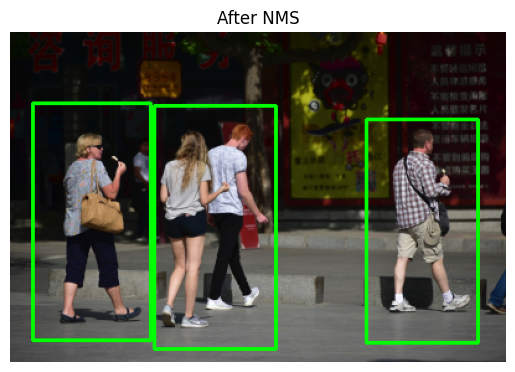

[INFO] 2.jpg: 2 original boxes, 2 after suppression


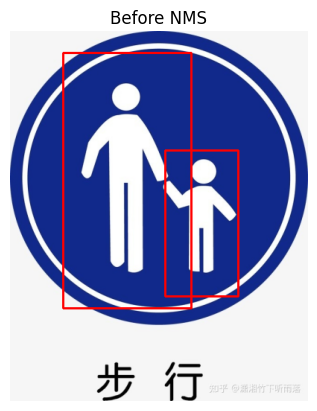

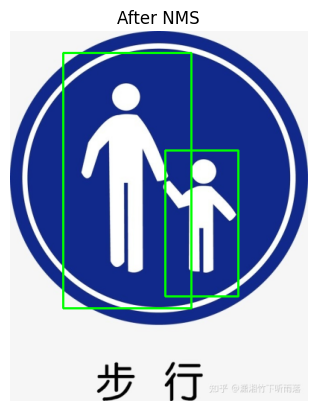

[INFO] 3.jpg: 1 original boxes, 1 after suppression


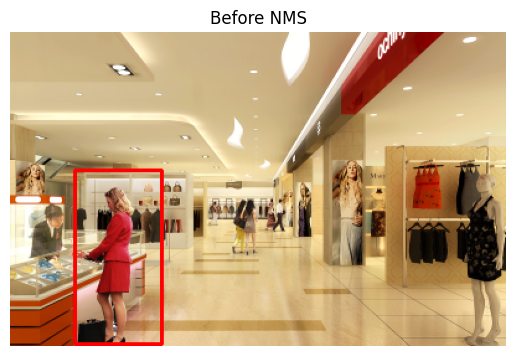

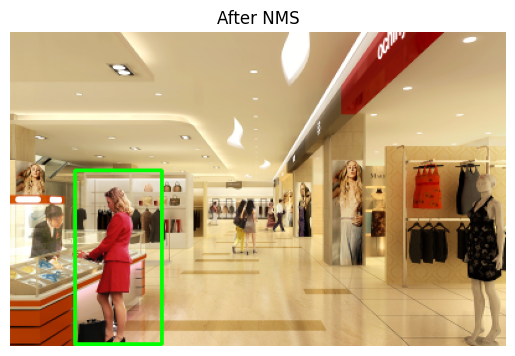

In [3]:
from imutils.object_detection import non_max_suppression
from imutils import paths
from helper import draw
import numpy as np
import imutils
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

for imagePath in paths.list_images("images"):
	# load the image and resize it to (1) reduce detection time
	# and (2) improve detection accuracy
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=min(400, image.shape[1]))
	orig = image.copy()

    # detect people in the image
	(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
		padding=(8, 8), scale=1.05)

    # draw the original bounding boxes
	for (x, y, w, h) in rects:
		cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # apply non-maxima suppression to the bounding boxes using a
	# fairly large overlap threshold to try to maintain overlapping
	# boxes that are still people
	rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
	pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
	for (xA, yA, xB, yB) in pick:
		cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

    # show some information on the number of bounding boxes
	filename = imagePath[imagePath.rfind("/") + 1:]
	print("[INFO] {}: {} original boxes, {} after suppression".format(
		filename, len(rects), len(pick)))

    # show the output images
	draw("Before NMS", orig, True)
	draw("After NMS", image, True)
